In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [107]:
data=pd.read_csv("canada_per_capita_income.csv")

In [109]:
data.rename(columns={"per capita income (US$)":"income"},inplace=True)
data

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


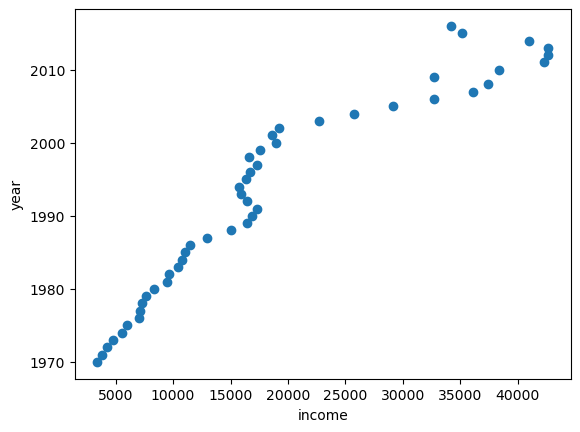

In [21]:
%matplotlib inline
plt.xlabel("income")
plt.ylabel("year")
plt.scatter(data["income"],data["year"])

In [36]:
reg=linear_model.LinearRegression()
reg.fit(data[['income']],data.year)

LinearRegression()

In [52]:
reg.coef_

array([0.00107538])

In [54]:
reg.intercept_

1972.6536140098344

In [64]:
x=[5102,5122,3645,8541,38452]
x


[5102, 5122, 3645, 8541, 38452]

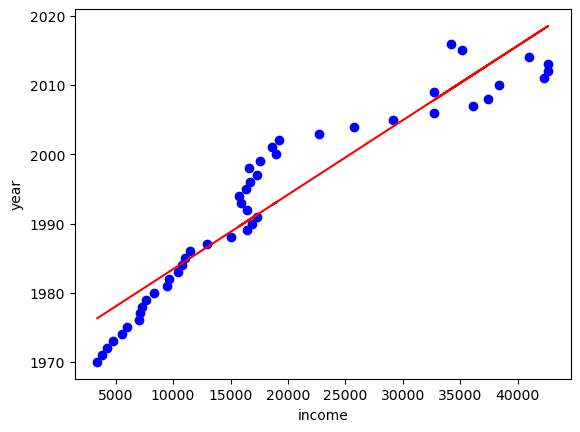

In [112]:
%matplotlib inline
plt.xlabel("income")
plt.ylabel("year")
plt.scatter(data["income"],data["year"],color='blue')
plt.plot(data.income,reg.predict(data[['income']]),color="red")

In [175]:
#**linear regression with multipal variables**

In [133]:
home=pd.read_csv("LinearRegressionWithMultipalRegression(homeprice).csv")
home

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [153]:
import math
median_bedrooms=math.floor(home.bedrooms.median())
median_bedrooms

4

In [167]:
home.bedrooms.fillna(median_bedrooms,inplace=True)
home
#data preprocessing step is over

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
%matplotlib inline
plt.xlabel("area")
plt.ylable("price")
plt.scatter(home.["area"],home["price"],color="yellow")
plt.show()

In [215]:
reg_multi=linear_model.LinearRegression()
reg_multi=reg_multi.fit(home[["area","bedrooms","age"]],home.price)

TypeError: 'Series' object is not callable

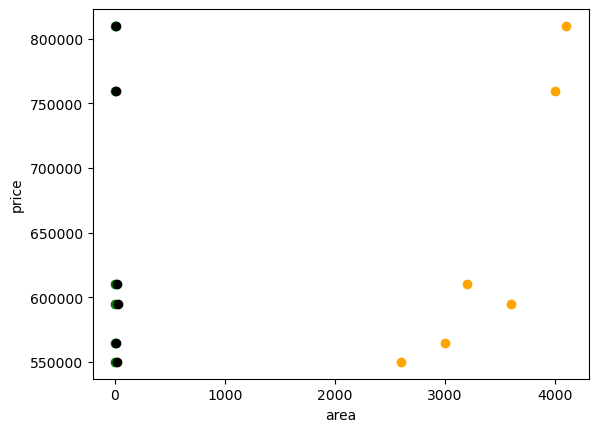

In [213]:
%matplotlib inline
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(home["area"],home["price"],color="orange")
plt.scatter(home["bedrooms"],home["price"],color="green")
plt.scatter(home["age"],home["price"],color="black")
plt.plot(home[["age","area","bedrooms"]],home.price())

In [217]:
p=reg_multi.predict([[3000,3,40]])
p

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [1]:
class meralr:
    def _init_(self):
        self.m=None
        self.b=None
        
    def fit(self,x_train,y_train):
        num=0
        den=0

        for i in range(x_train.shape[0]):
            num=num+((x_train[i]-x_train.mean())* (y_train[i]-y_train.mean()))
            den=den+((x_train[i]-x_train.mean())*(x_train[i]-x_train.mean()))

        self.m=num/den
        self.b=y_train.mean()-(self.m*x_train.mean())
        print(self.m)
        print(self.b)
        
    def predict(self,x_test):
        return x_test*self.m+self.b
        

In [89]:
x=data.iloc[:,0].values
y=data.iloc[:,1].values

In [91]:
x
y

array([ 3399.299037,  3768.297935,  4251.175484,  4804.463248,
        5576.514583,  5998.144346,  7062.131392,  7100.12617 ,
        7247.967035,  7602.912681,  8355.96812 ,  9434.390652,
        9619.438377, 10416.53659 , 10790.32872 , 11018.95585 ,
       11482.89153 , 12974.80662 , 15080.28345 , 16426.72548 ,
       16838.6732  , 17266.09769 , 16412.08309 , 15875.58673 ,
       15755.82027 , 16369.31725 , 16699.82668 , 17310.75775 ,
       16622.67187 , 17581.02414 , 18987.38241 , 18601.39724 ,
       19232.17556 , 22739.42628 , 25719.14715 , 29198.05569 ,
       32738.2629  , 36144.48122 , 37446.48609 , 32755.17682 ,
       38420.52289 , 42334.71121 , 42665.25597 , 42676.46837 ,
       41039.8936  , 35175.18898 , 34229.19363 ])

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=2)

In [95]:
x_test[0]

1993

In [97]:
y_test

array([15875.58673 ,  9619.438377, 42665.25597 , 11482.89153 ,
       29198.05569 , 42676.46837 , 35175.18898 , 10416.53659 ,
       10790.32872 ,  3399.299037])

In [131]:
abc = meralr()
abc.fit(x_train,y_train)

796.936819883258
-1569692.1747126176


In [133]:
y_predict=abc.predict(x_test)

In [135]:
from sklearn.metrics import mean_absolute_error,mean_squared_error ,r2_score

In [137]:
print("MAE", mean_absolute_error(y_predict,y_test))

MAE 2751.663951445077


In [139]:
print("MSE",mean_squared_error(y_predict,y_test))

MSE 16782853.094033528


In [141]:
print("R2 score",r2_score(y_predict,y_test))

R2 score 0.8826642543471592
